# <center> FINAL PROJECT: STUDENT PERFORMANCE FACTORS <center> 

## A. INFORMATION

### I. Member Information


<center>

|No. | Name          | Student ID   | Email                    |
|:--:|:-------------:|:------------:|:------------------------:|
| 1  | Võ Hùng Khoa  | 22127202     | vhkhoa22@clc.fitus.edu.vn|
| 2  | Vũ Tuấn Hùng  | 22127137     | vthung22@clc.fitus.edu.vn|
| 3  | Huỳnh Tấn Đạt | 22127059     | htdat222@clc.fitus.edu.vn|

<center>

### II. Project Information 
#### 1. Project Introduction 
- In this project, students are required to select a public dataset, such as those available on *Kaggle*, related to a topic of interest to their group. The project involves exploring the dataset, which often includes preprocessing steps, and identifying meaningful questions that can be answered using the data. Students are then tasked with preprocessing and analyzing the data to address each question effectively, demonstrating their ability to draw insights and conclusions from the analysis.

#### 2. Topic
- The chosen topic: **Student Performance Factors** 

- Using a dataset that covers study habits, attendance, parental involvement, and other factors, the project aims to analyze how these aspects impact students' exam performance.


## B. Project Details

### I. Import Library and Read Dataset

#### 1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.preprocessing import LabelEncoder
# Import more library if you need it
%matplotlib inline

#### 2. Read Dataset

In [2]:
data =  pd.read_csv("./StudentPerformanceFactors.csv")
data.head()

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \
0             Yes                  0           Low          Medium   
1             Yes                  2        Medium          Medium   
2             Yes                  2        Medium          Medium   
3             Yes                  1        Medium          Medium   
4             Yes                  3        Medium            High   

  School_Type Peer_Influence  Physical_Activity Learning_Disabilities  \
0      Public       Positive                  3                    No   
1      Public       Negative                  4                    No   
2      Public        Neutral                  4                    No   
3      Public       Negative                  4                    No   
4      Public        Neutral                  4                    No   

  Parental_Education_Level Distance_from_Home  Gender  Exam_Score  
0              High School               Near    Male          67  
1                  College           Moderate  Female          61  
2             Postgraduate               Near    Male          74  
3              High School           Moderate    Male          71  
4                  College               Near  Female          70

### II. Data Preprocessing

#### 1. Hanlde Null and Duplicate Values

Looking at the big picture to identify what to do with the dataset!?

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

There are some null values in the dataset, so we are going to drop them all!

In [4]:
# Drop null-value
data.dropna(axis = 0 , inplace=True)
data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

Then, we are going to drop the duplicate values!

In [5]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### 2. Convert categorical data type to numeric data type

Looks clean! However, after completing the data preprocessing, we need to handle the object values and convert them to numeric values. Before that, we need to learn more about the dataset we are going to handle.

<!-- <center> -->

| Attribute                | Description                                                                 |
|--------------------------|-----------------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                                    |
| Attendance               | Percentage of classes attended.                                             |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High).|
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).                 |
| Extracurricular_Activities| Participation in extracurricular activities (Yes, No).                      |
| Sleep_Hours              | Average number of hours of sleep per night.                                 |
| Previous_Scores          | Scores from previous exams.                                                 |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                          |
| Internet_Access          | Availability of internet access (Yes, No).                                  |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                             |
| Family_Income            | Family income level (Low, Medium, High).                                   |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                               |
| School_Type              | Type of school attended (Public, Private).                                  |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative).   |
| Physical_Activity        | Average number of hours of physical activity per week.                      |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                               |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate).   |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                         |
| Gender                   | Gender of the student (Male, Female).                                       |
| Exam_Score               | Final exam score.                                                           |

<!-- <center> -->

In [6]:
# Handle each categorical columns

ordinal_mapping = {"Low": 0, "Medium": 1, "High": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(ordinal_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(ordinal_mapping)

education_mapping = {"High School": 0, "College": 1, "Postgraduate": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(education_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(education_mapping)

distance_mapping = {"Near": 0, "Moderate": 1, "Far": 2}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(distance_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(distance_mapping)

sentiment_mapping = {"Positive": 2, "Neutral": 1, "Negative": 0}
for column in data.select_dtypes(include=['object']).columns:
    if set(data[column].unique()).issubset(sentiment_mapping.keys()):  # Kiểm tra nếu cột có giá trị thứ tự
        data[column] = data[column].map(sentiment_mapping)

# Handle remaining categorical columns
for column in data.select_dtypes(include=['object']).columns:
    unique_values = data[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)

In [7]:
data.head()

Hours_Studied  Attendance  Parental_Involvement  Access_to_Resources  \
0             23          84                     0                    2   
1             19          64                     0                    1   
2             24          98                     1                    1   
3             29          89                     0                    1   
4             19          92                     1                    1   

   Extracurricular_Activities  Sleep_Hours  Previous_Scores  Motivation_Level  \
0                           0            7               73                 0   
1                           0            8               59                 0   
2                           1            7               91                 1   
3                           1            8               98                 1   
4                           1            6               65                 1   

   Internet_Access  Tutoring_Sessions  Family_Income  Teacher_Quality  \
0                0                  0              0                1   
1                0                  2              1                1   
2                0                  2              1                1   
3                0                  1              1                1   
4                0                  3              1                2   

   School_Type  Peer_Influence  Physical_Activity  Learning_Disabilities  \
0            0               2                  3                      0   
1            0               0                  4                      0   
2            0               1                  4                      0   
3            0               0                  4                      0   
4            0               1                  4                      0   

   Parental_Education_Level  Distance_from_Home  Gender  Exam_Score  
0                         0                   0       0          67  
1                         1                   1       1          61  
2                         2                   0       0          74  
3                         0                   1       0          71  
4                         1                   0       1          70

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6378 non-null   int64
 1   Attendance                  6378 non-null   int64
 2   Parental_Involvement        6378 non-null   int64
 3   Access_to_Resources         6378 non-null   int64
 4   Extracurricular_Activities  6378 non-null   int64
 5   Sleep_Hours                 6378 non-null   int64
 6   Previous_Scores             6378 non-null   int64
 7   Motivation_Level            6378 non-null   int64
 8   Internet_Access             6378 non-null   int64
 9   Tutoring_Sessions           6378 non-null   int64
 10  Family_Income               6378 non-null   int64
 11  Teacher_Quality             6378 non-null   int64
 12  School_Type                 6378 non-null   int64
 13  Peer_Influence              6378 non-null   int64
 14  Physical_Acti

Apply some logical to the dataset

In [9]:
data = data[(data["Exam_Score"] <= 100) & (data["Exam_Score"] >= 0)]
data = data[(data["Previous_Scores"] <= 100) & (data["Previous_Scores"] >= 0)]

In [10]:
data.describe()

Hours_Studied   Attendance  Parental_Involvement  Access_to_Resources  \
count    6377.000000  6377.000000           6377.000000          6377.000000   
mean       19.976008    80.018034              1.085620             1.098165   
std         5.985283    11.549434              0.694942             0.698689   
min         1.000000    60.000000              0.000000             0.000000   
25%        16.000000    70.000000              1.000000             1.000000   
50%        20.000000    80.000000              1.000000             1.000000   
75%        24.000000    90.000000              2.000000             2.000000   
max        44.000000   100.000000              2.000000             2.000000   

       Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
count                 6377.000000  6377.000000      6377.000000   
mean                     0.596832     7.035126        75.063353   
std                      0.490572     1.468091        14.399766   
min                      0.000000     4.000000        50.000000   
25%                      0.000000     6.000000        63.000000   
50%                      1.000000     7.000000        75.000000   
75%                      1.000000     8.000000        88.000000   
max                      1.000000    10.000000       100.000000   

       Motivation_Level  Internet_Access  Tutoring_Sessions  Family_Income  \
count       6377.000000      6377.000000        6377.000000    6377.000000   
mean           0.908107         0.075898           1.494747       0.787831   
std            0.695720         0.264855           1.233300       0.743430   
min            0.000000         0.000000           0.000000       0.000000   
25%            0.000000         0.000000           1.000000       0.000000   
50%            1.000000         0.000000           1.000000       1.000000   
75%            1.000000         0.000000           2.000000       1.000000   
max            2.000000         1.000000           8.000000       2.000000   

       Teacher_Quality  School_Type  Peer_Influence  Physical_Activity  \
count      6377.000000  6377.000000     6377.000000        6377.000000   
mean          1.197115     0.304846        1.191626           2.972714   
std           0.601027     0.460378        0.756386           1.029006   
min           0.000000     0.000000        0.000000           0.000000   
25%           1.000000     0.000000        1.000000           2.000000   
50%           1.000000     0.000000        1.000000           3.000000   
75%           2.000000     1.000000        2.000000           4.000000   
max           2.000000     1.000000        2.000000           6.000000   

       Learning_Disabilities  Parental_Education_Level  Distance_from_Home  \
count            6377.000000               6377.000000         6377.000000   
mean                0.104751                  0.705504            0.503685   
std                 0.306257                  0.780581            0.670465   
min                 0.000000                  0.000000            0.000000   
25%                 0.000000                  0.000000            0.000000   
50%                 0.000000                  1.000000            0.000000   
75%                 0.000000                  1.000000            1.000000   
max                 1.000000                  2.000000            2.000000   

            Gender   Exam_Score  
count  6377.000000  6377.000000  
mean      0.421672    67.246825  
std       0.493865     3.891637  
min       0.000000    55.000000  
25%       0.000000    65.000000  
50%       0.000000    67.000000  
75%       1.000000    69.000000  
max       1.000000   100.000000

All columns are in well format so now we can move on the next step!!! 

### III. Exploratory Data Analysis - EDA

#### 1. Overall

In [11]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Comment: 

#### 2. Additional Visualizations

To gain deeper insights into the factors affecting student performance, we will create additional visualizations. These visualizations will help us understand the relationships between various factors and the final exam scores.

##### **Distribution of Exam Scores**

First, let's visualize the distribution of exam scores to understand the overall performance of students.


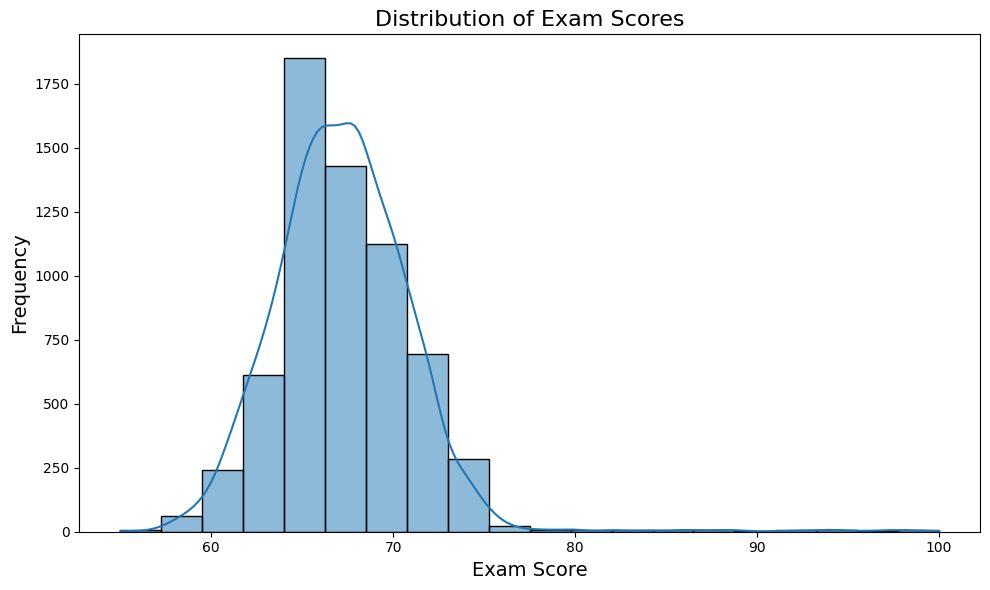

In [12]:
# Visualize the distribution of Exam Scores
plt.figure(figsize=(10, 6))
sns.histplot(data['Exam_Score'], bins=20, kde=True)
plt.title('Distribution of Exam Scores', fontsize=16)
plt.xlabel('Exam Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.tight_layout()
plt.show()

##### **Visualizing the Distribution of Categorical Attributes**

To further understand the dataset, we visualize the distribution of various categorical attributes. This helps us identify any imbalances or patterns in the data that could influence our analysis. The following plot shows the distribution of each categorical attribute in the dataset.

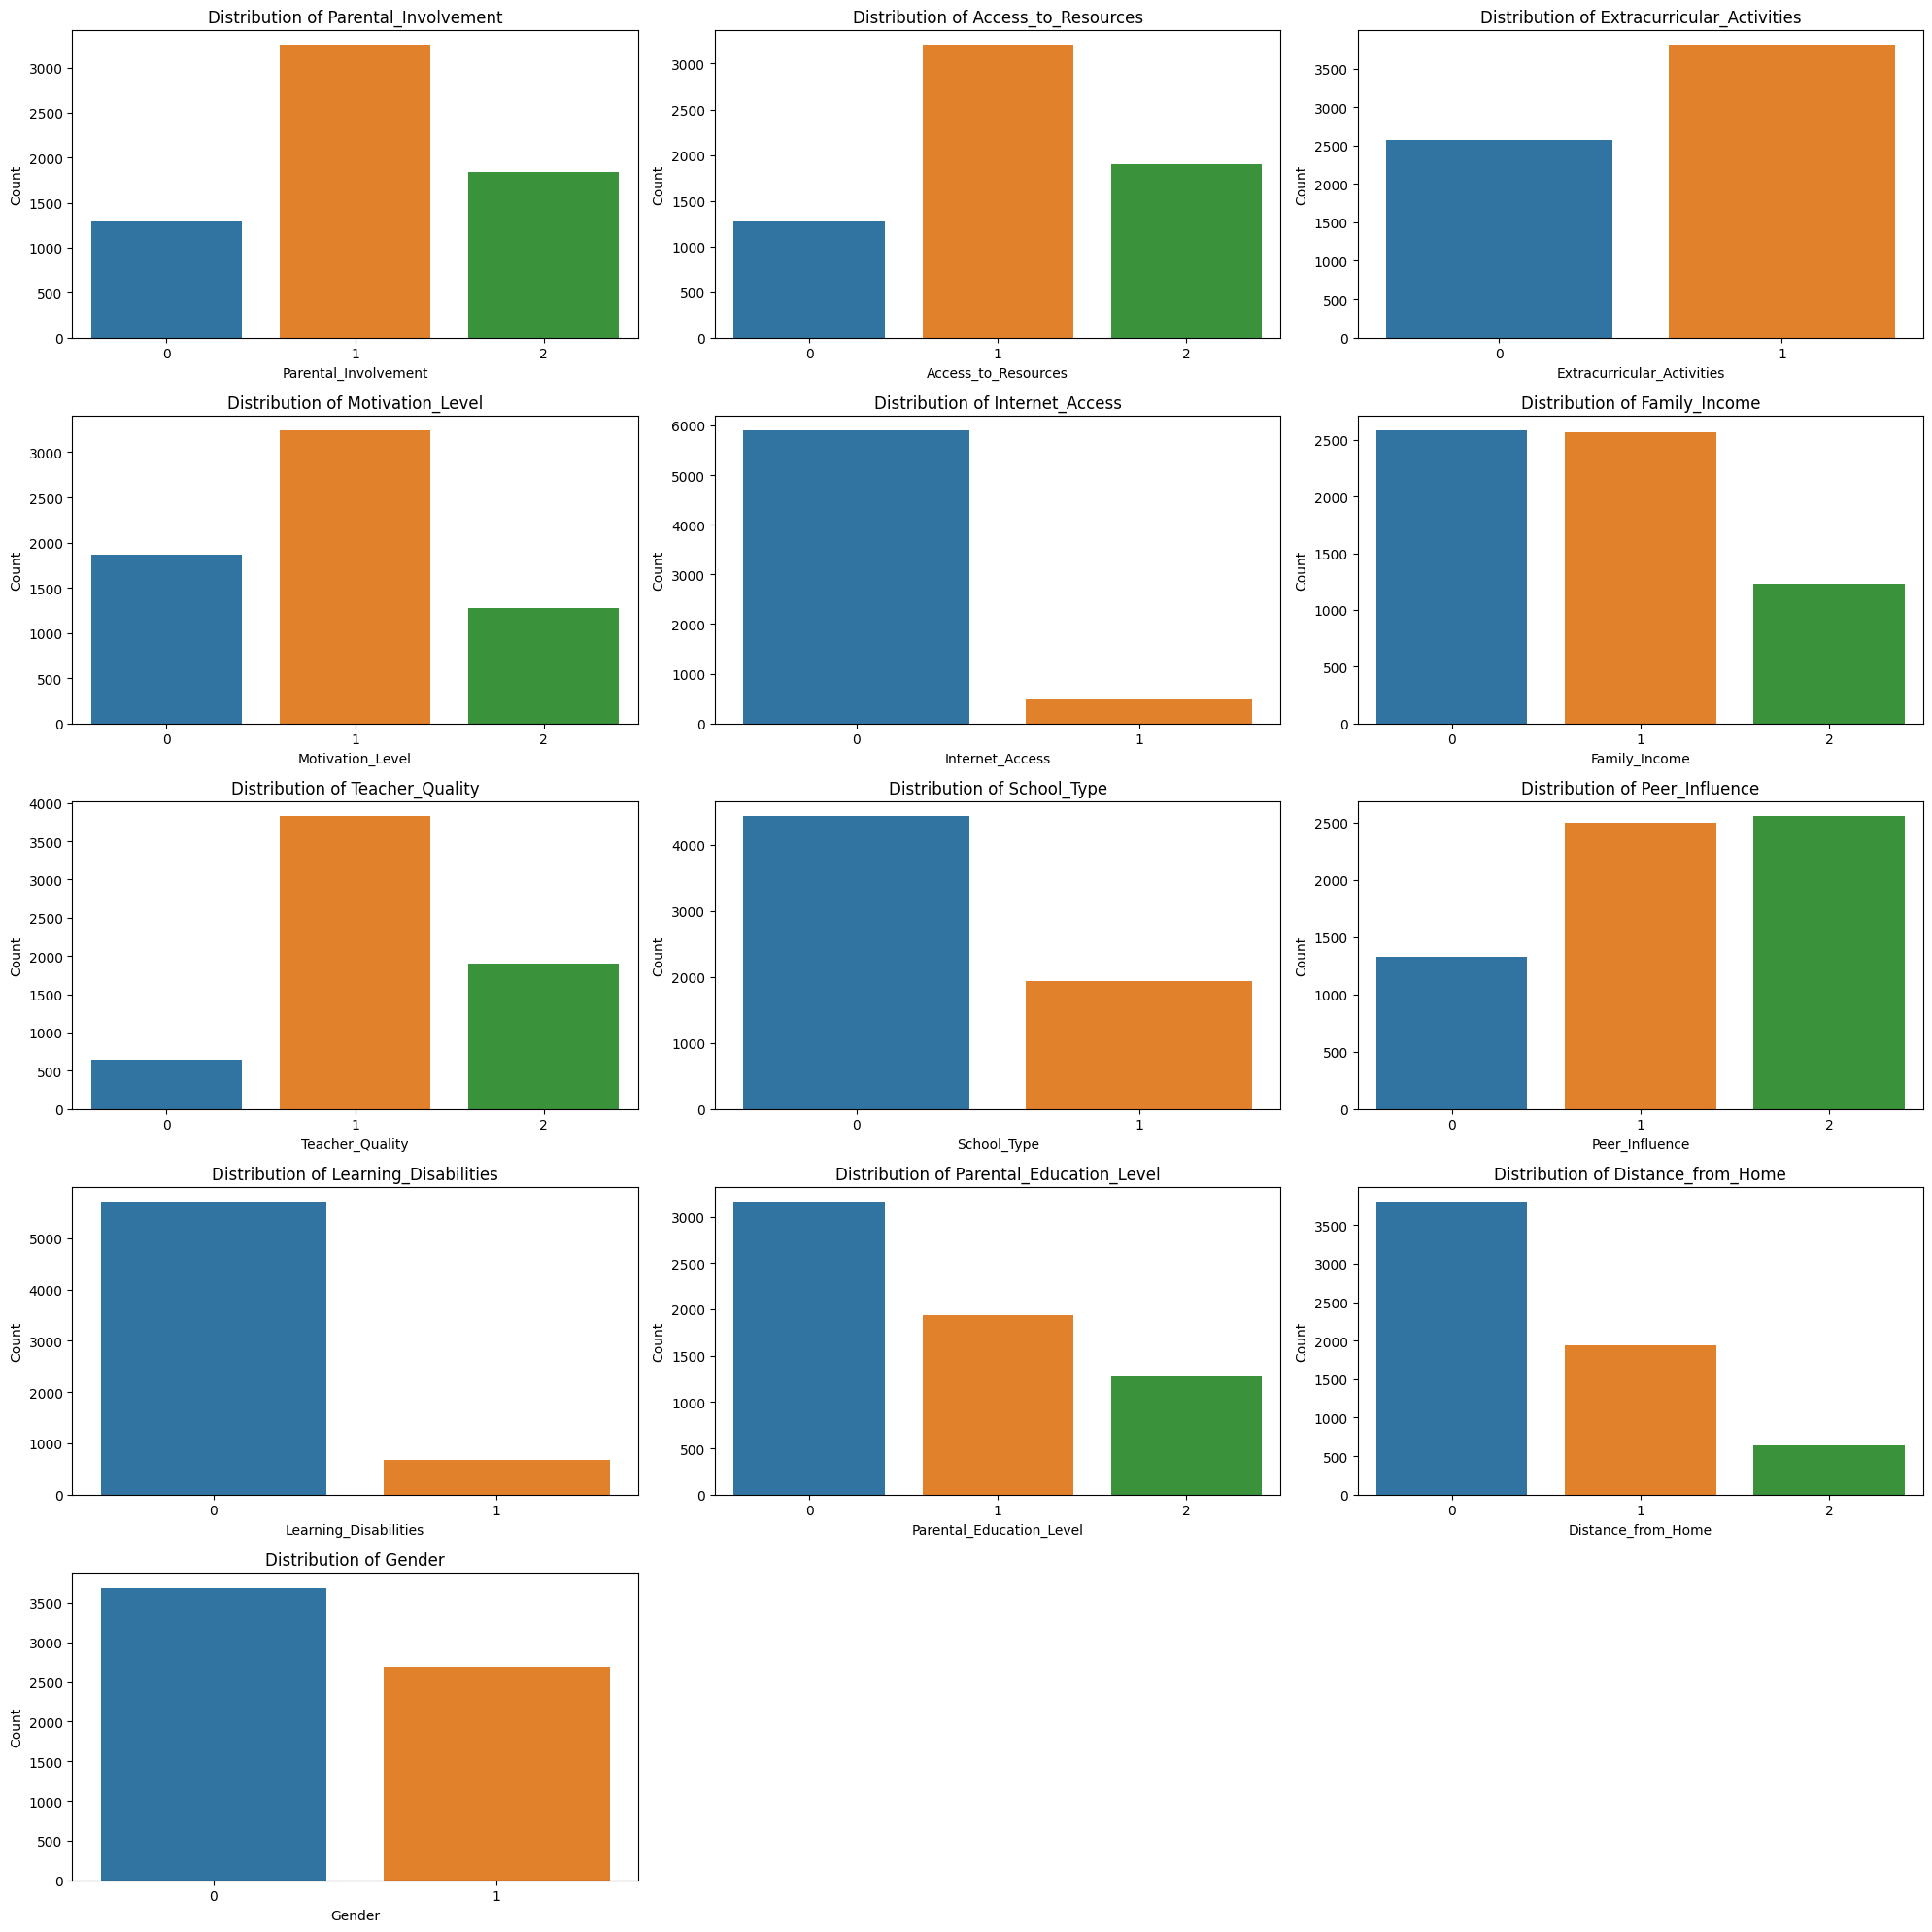

In [13]:
# Visualize all categorical attributes
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level',
                         'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence',
                         'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### **Correlation Table and Visualization**

To better understand the relationships between different variables in our dataset, we will create a correlation table and visualize it using a heatmap. This will help us identify which factors are most strongly associated with exam scores and other key attributes.

In [14]:
# Ensure the correlations variable is defined
correlations = data.corr()

# Display the correlation coefficients as a DataFrame
correlation_df = correlations.reset_index()
correlation_df

index  Hours_Studied  Attendance  \
0                Hours_Studied       1.000000   -0.005285   
1                   Attendance      -0.005285    1.000000   
2         Parental_Involvement      -0.014626   -0.007931   
3          Access_to_Resources      -0.003750   -0.012289   
4   Extracurricular_Activities      -0.008530   -0.001955   
5                  Sleep_Hours       0.013251   -0.019434   
6              Previous_Scores       0.022268   -0.018393   
7             Motivation_Level      -0.011151   -0.002253   
8              Internet_Access      -0.007063    0.018574   
9            Tutoring_Sessions      -0.010184    0.011386   
10               Family_Income       0.000971   -0.012195   
11             Teacher_Quality      -0.007143   -0.002049   
12                 School_Type      -0.001045    0.021148   
13              Peer_Influence       0.008326   -0.006895   
14           Physical_Activity       0.003179   -0.022987   
15       Learning_Disabilities      -0.013859   -0.020798   
16    Parental_Education_Level      -0.007824    0.026632   
17          Distance_from_Home       0.017121   -0.020597   
18                      Gender       0.006978   -0.004908   
19                  Exam_Score       0.446174    0.581664   

    Parental_Involvement  Access_to_Resources  Extracurricular_Activities  \
0              -0.014626            -0.003750                   -0.008530   
1              -0.007931            -0.012289                   -0.001955   
2               1.000000            -0.029264                   -0.022483   
3              -0.029264             1.000000                   -0.012179   
4              -0.022483            -0.012179                    1.000000   
5              -0.004639            -0.013607                    0.003116   
6              -0.020760             0.024246                    0.002506   
7              -0.023624             0.006945                    0.015966   
8              -0.014009             0.017364                    0.003782   
9              -0.002403            -0.014872                    0.005961   
10              0.010881            -0.004886                   -0.005799   
11              0.014785            -0.011725                    0.015310   
12              0.014488             0.025923                   -0.006418   
13              0.020699            -0.002065                    0.008737   
14             -0.005505            -0.012853                   -0.001600   
15              0.007963            -0.005552                   -0.011153   
16             -0.007577            -0.005362                    0.003625   
17             -0.004043             0.000232                    0.013816   
18              0.016802            -0.002257                   -0.007692   
19              0.159087             0.169035                    0.062319   

    Sleep_Hours  Previous_Scores  Motivation_Level  Internet_Access  ...  \
0      0.013251         0.022268         -0.011151        -0.007063  ...   
1     -0.019434        -0.018393         -0.002253         0.018574  ...   
2     -0.004639        -0.020760         -0.023624        -0.014009  ...   
3     -0.013607         0.024246          0.006945         0.017364  ...   
4      0.003116         0.002506          0.015966         0.003782  ...   
5      1.000000        -0.023104          0.000550        -0.011698  ...   
6     -0.023104         1.000000          0.007156        -0.003934  ...   
7      0.000550         0.007156          1.000000        -0.020874  ...   
8     -0.011698        -0.003934         -0.020874         1.000000  ...   
9     -0.011159        -0.013723          0.006018         0.007943  ...   
10    -0.015875        -0.016867          0.008390         0.000549  ...   
11     0.010282        -0.003002         -0.012562        -0.002368  ...   
12    -0.000762        -0.012188         -0.013887         0.010875  ...   
13    -0.017503        -0.020396          0.001578         0.

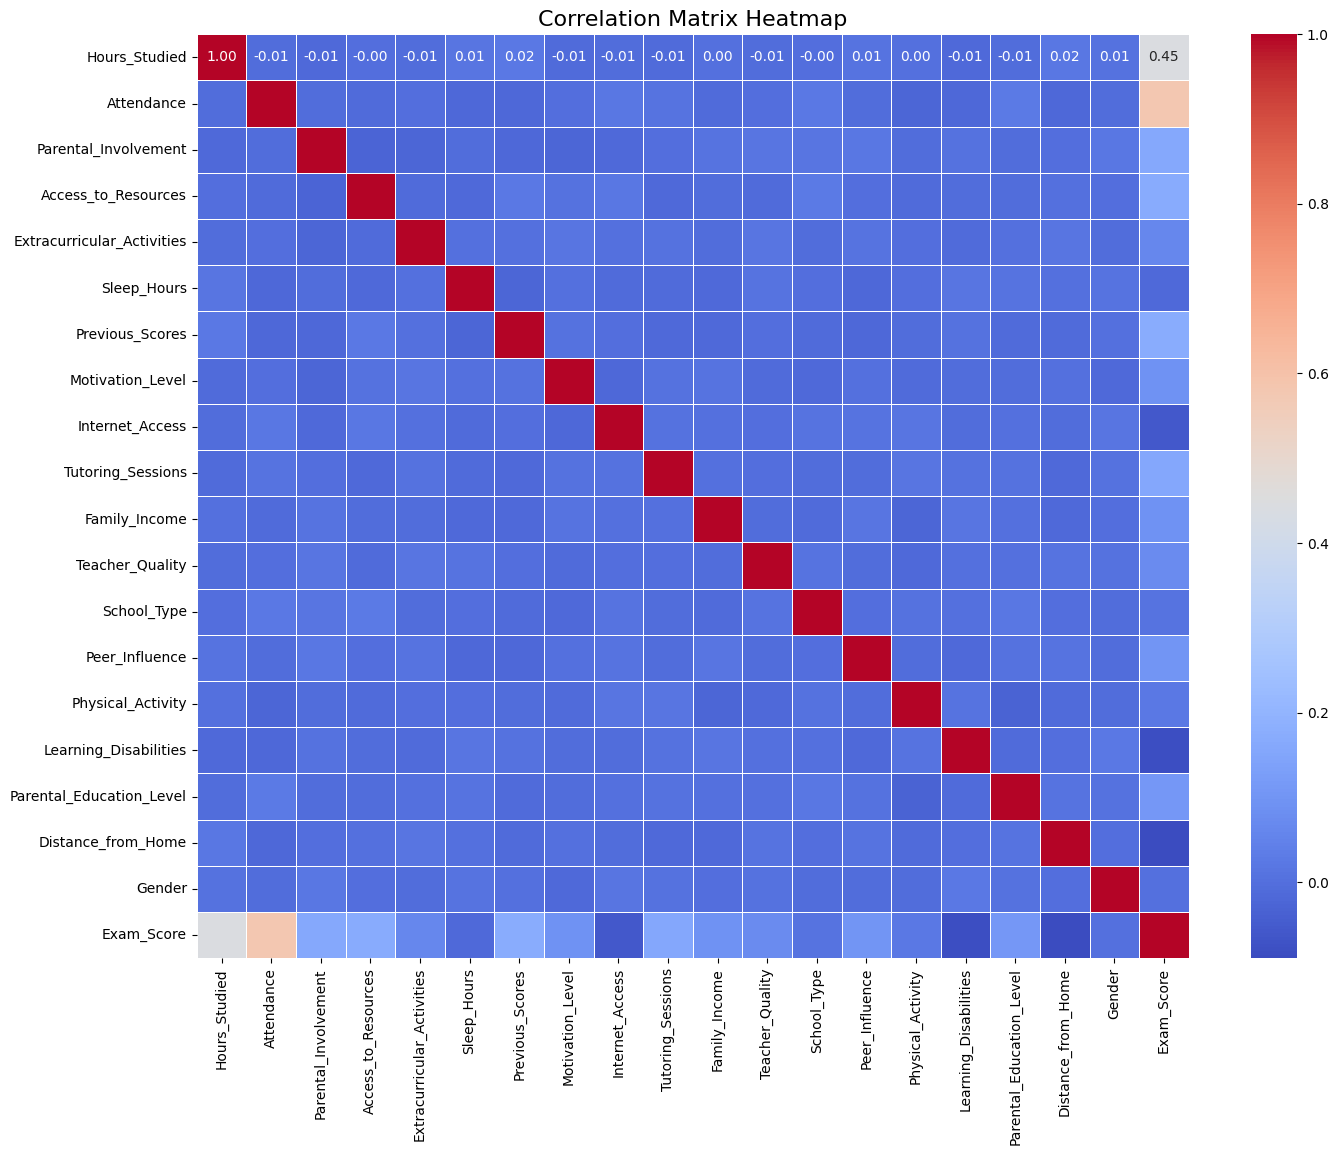

In [15]:
# Encode categorical columns
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['category']).columns:
    data[column] = label_encoder.fit_transform(data[column])

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap', fontsize=16)
plt.show()

##### **Exploring the Relationship Between Exam Scores and Key Factors**

To gain deeper insights into how certain factors impact exam performance, we use box plots to analyze the relationship between Exam_Score and two crucial predictors:

- `Hours Studied`: This helps identify the variability of exam scores across different levels of study time.
- `Attendance`: This explores whether attending more classes correlates with better performance.

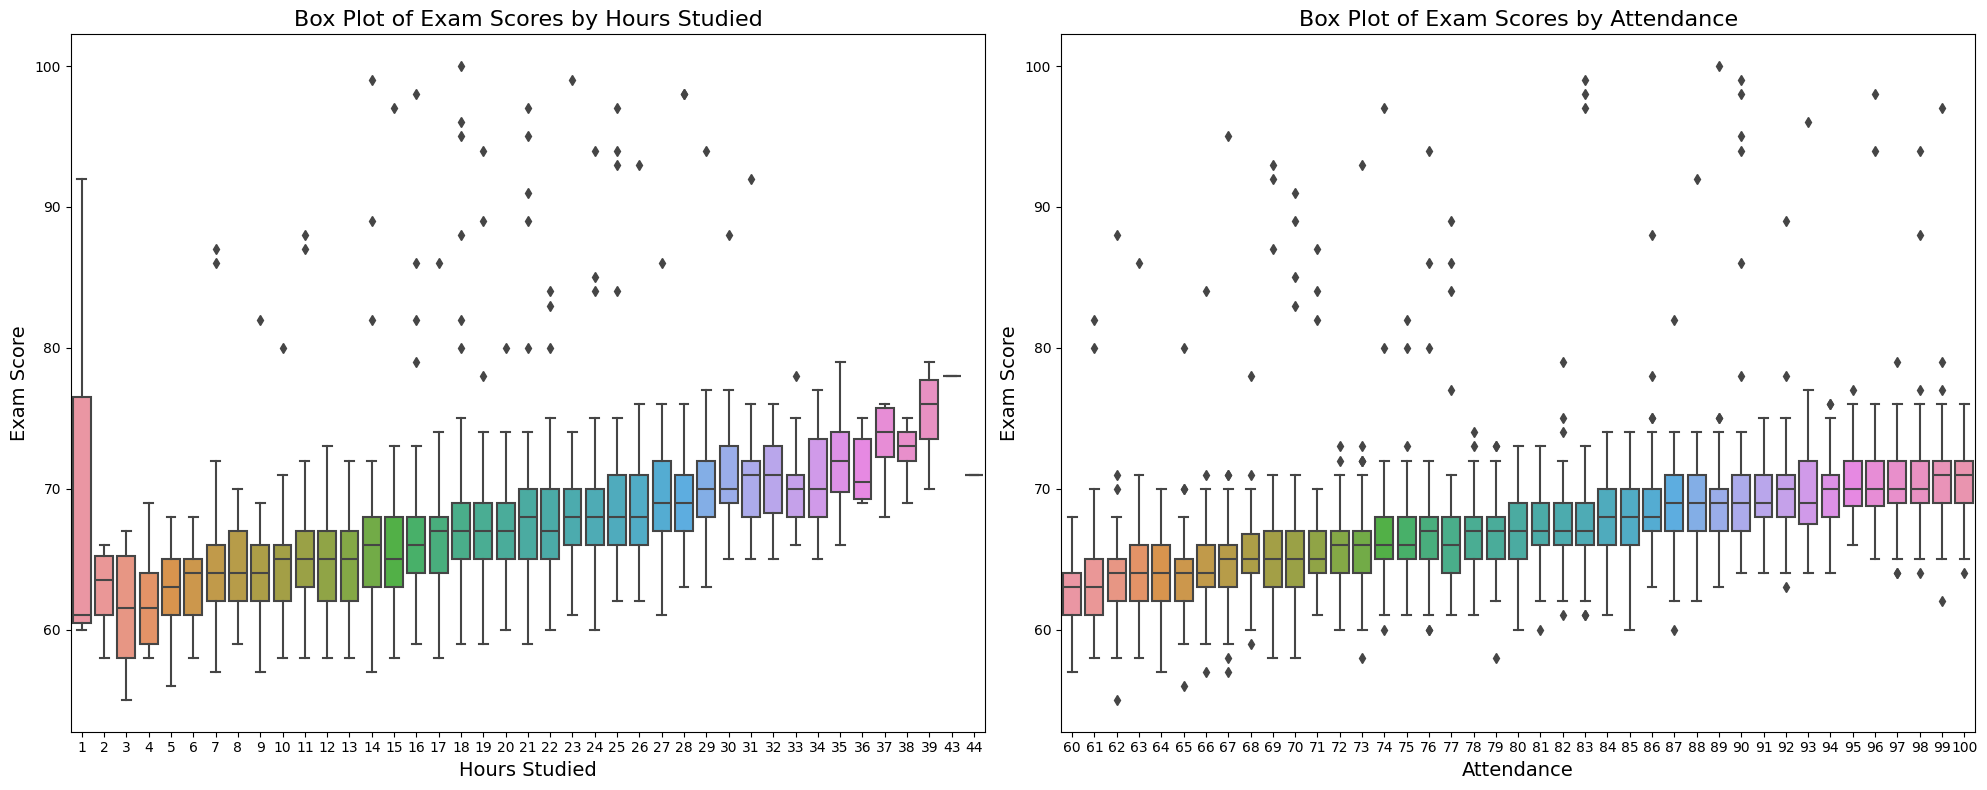

In [16]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 8))

# Box Plot cho yếu tố 'Hours_Studied'
sns.boxplot(data=data, x='Hours_Studied', y='Exam_Score', ax=axes[0])
axes[0].set_title('Box Plot of Exam Scores by Hours Studied', fontsize=16)
axes[0].set_xlabel('Hours Studied', fontsize=14)
axes[0].set_ylabel('Exam Score', fontsize=14)

# Box Plot cho yếu tố 'Attendance'
sns.boxplot(data=data, x='Attendance', y='Exam_Score', ax=axes[1])
axes[1].set_title('Box Plot of Exam Scores by Attendance', fontsize=16)
axes[1].set_xlabel('Attendance', fontsize=14)
axes[1].set_ylabel('Exam Score', fontsize=14)

plt.tight_layout()
plt.show()

By comparing these two factors side-by-side, we can identify potential trends and relationships that might inform further analysis or predictive modeling.

##### **Pair Plot Analysis of Continuous Variables**

To better understand the relationships and interactions among continuous variables, a pair plot is generated for the following features: `Hours_Studied`, `Attendance`, `Previous_Scores`, `Exam_Score`

<Figure size 1600x1200 with 0 Axes>

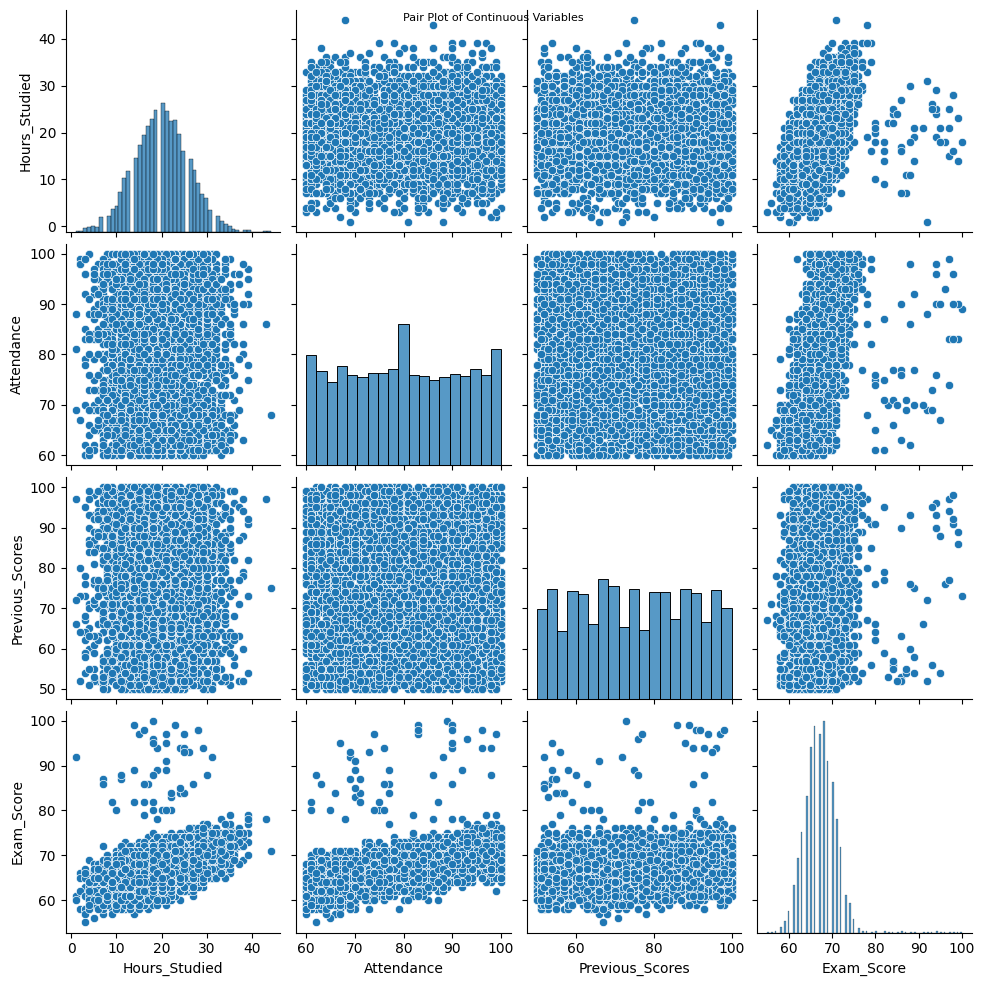

In [17]:
plt.figure(figsize=(16, 12))
sns.pairplot(data[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Exam_Score']])
plt.suptitle('Pair Plot of Continuous Variables', fontsize=8)
plt.show();

This visualization gives a holistic view of the continuous variables, allowing us to spot trends such as whether higher attendance or prior scores consistently lead to better exam outcomes. It serves as a foundation for determining which variables to prioritize in further modeling and analysis.

### VI. Ask Meaningful Question

#### **Question 3: Can factors like Attendance or Hours_Studied help improve Exam_Score even for students with lower Previous_Scores?**

##### **Why This Question is Important?**

- **Support for Low Performers**: This question addresses whether students with lower Previous_Scores can still achieve high academic performance by focusing on actionable factors like Attendance and Hours_Studied. It highlights strategies for improvement for those struggling with past performance.

- **Actionable Insights**: Identifying the impact of these factors provides clear guidance to students and educators on where to direct efforts for better outcomes.

- **Equity Consideration**: Understanding how external factors compensate for prior performance helps in designing interventions for students with diverse academic backgrounds.

##### **What We Gain by Answering?**

- **Targeted insights**: Determine if students with lower Previous_Scores can achieve significant improvements through higher attendance and study hours.

- **Educational impact**: Insights from this analysis can inform strategies to help struggling students.

- **Predictive modeling**: Create a model to predict Exam_Score while focusing on the interaction between these factors.

##### **Plan to Answer the Question**

**1. Segment the data**: Divide students into two groups based on their `Previous_Scores` (e.g., low and high performers).

**2. Analyze relationships**: Investigate whether `Attendance` and `Hours_Studied` have a stronger impact on the `Exam_Score` of low-performing students.

**3. Visualize interactions**: Use plots like scatter plots and trend lines, segmented by performance groups, to observe patterns.

**4. Build interaction model**: Construct a regression model with interaction terms to evaluate the combined effects of Attendance, Hours_Studied, and Previous_Score.

**5. Interpret results**: Assess whether the interaction terms show that effort-based factors disproportionately benefit low performers.

#### Answer the Question

##### **Step 1: Segment the Data**

To answer the question, we first need to divide students into **low performers** and **high performers** based on their `Previous_Scores`. This segmentation will help us analyze whether factors like `Attendance` and `Hours_Studied` have a stronger influence on students who started with lower scores.

We define the threshold for segmentation as the **median value of** `Previous_Scores`. Students with scores below or equal to the median are considered **low performers**, while those above the median are classified as **high performers**.

In [18]:
# Define the threshold as the median of Previous_Scores
threshold = data['Previous_Scores'].median()

# Segment the data
low_performers = data[data['Previous_Scores'] <= threshold]
high_performers = data[data['Previous_Scores'] > threshold]

print(f"Median of Previous_Scores: {threshold}")
print(f"Number of Low Performers: {len(low_performers)}")
print(f"Number of High Performers: {len(high_performers)}")

Median of Previous_Scores: 75.0
Number of Low Performers: 3257
Number of High Performers: 3120


**Observation**

- **Median of** `Previous_Scores`: 75.0

    This indicates that students scoring 75 or below are categorized as low performers, while those scoring above 75 are high performers.

- **Distribution**:
    - **Low Performers**: 3257 students
    - **High Performers**: 3120 students

The two groups are nearly balanced in size, which is ideal for comparative analysis. We can now proceed to explore how `Attendance` and `Hours_Studied` influence the `Exam_Score` in each group.

##### **Step 2: Visualizing Interactions for Both Groups**

To understand the relationships between `Attendance`, `Hours_Studied`, and `Exam_Score` for **low performers** and **high performers**, we will create scatter plots with trend lines.

These visualizations will help us answer:

- Whether higher `Attendance` improves `Exam_Score` more significantly for low performers compared to high performers.

- Whether increased `Hours_Studied` has a greater effect on `Exam_Score` for students with lower prior performance.

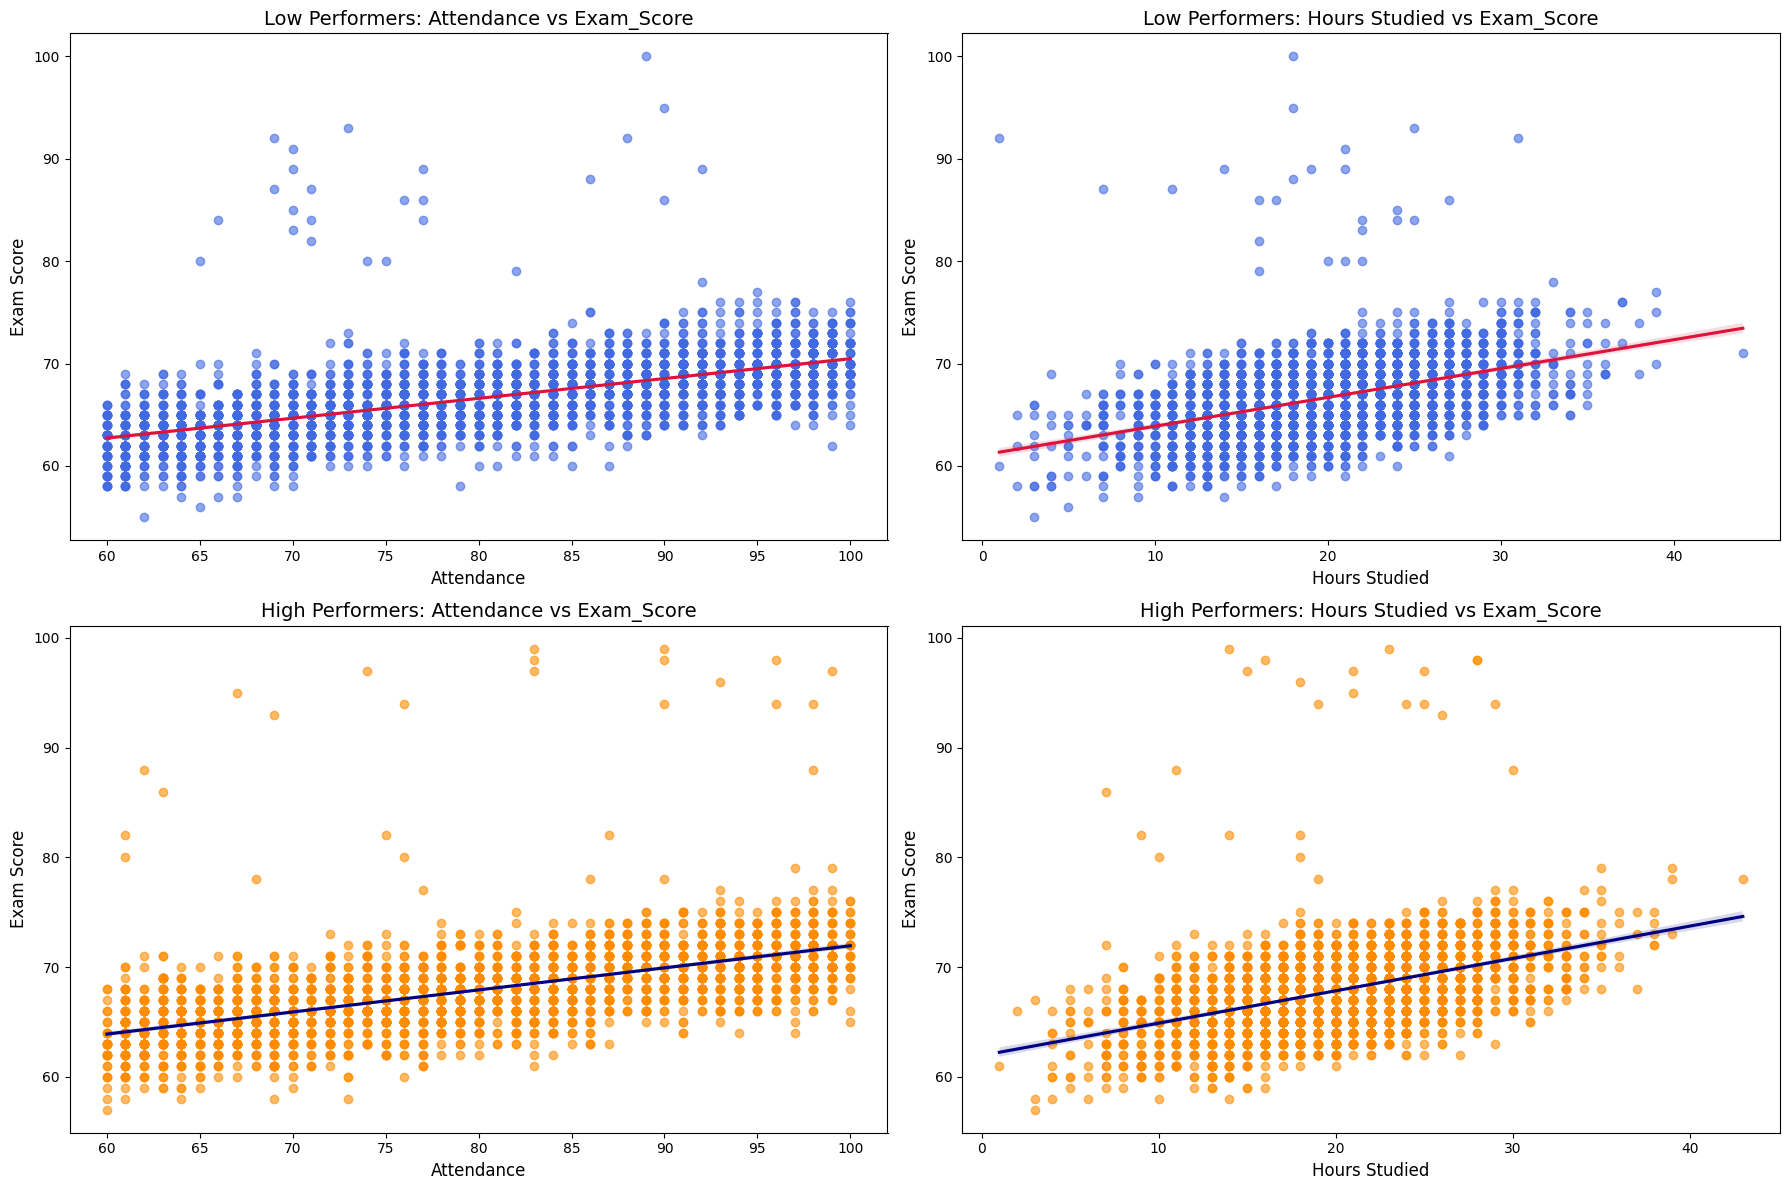

In [19]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18, 12))

# Low Performers
sns.regplot(data=low_performers, x='Attendance', y='Exam_Score', ax=axes[0, 0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'crimson'}, color='royalblue')
axes[0, 0].set_title('Low Performers: Attendance vs Exam_Score', fontsize=14)
axes[0, 0].set_xlabel('Attendance', fontsize=12)
axes[0, 0].set_ylabel('Exam Score', fontsize=12)

sns.regplot(data=low_performers, x='Hours_Studied', y='Exam_Score', ax=axes[0, 1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'crimson'}, color='royalblue')
axes[0, 1].set_title('Low Performers: Hours Studied vs Exam_Score', fontsize=14)
axes[0, 1].set_xlabel('Hours Studied', fontsize=12)
axes[0, 1].set_ylabel('Exam Score', fontsize=12)

# High Performers
sns.regplot(data=high_performers, x='Attendance', y='Exam_Score', ax=axes[1, 0], scatter_kws={'alpha': 0.6}, line_kws={'color': 'navy'}, color='darkorange')
axes[1, 0].set_title('High Performers: Attendance vs Exam_Score', fontsize=14)
axes[1, 0].set_xlabel('Attendance', fontsize=12)
axes[1, 0].set_ylabel('Exam Score', fontsize=12)

sns.regplot(data=high_performers, x='Hours_Studied', y='Exam_Score', ax=axes[1, 1], scatter_kws={'alpha': 0.6}, line_kws={'color': 'navy'}, color='darkorange')
axes[1, 1].set_title('High Performers: Hours Studied vs Exam_Score', fontsize=14)
axes[1, 1].set_xlabel('Hours Studied', fontsize=12)
axes[1, 1].set_ylabel('Exam Score', fontsize=12)

plt.tight_layout()
plt.show();

**Observations from the Scatter Plots**

**1. Attendance vs. Exam Score:**

- For **low performers**: There is a positive correlation between `Attendance` and `Exam_Score`, as evidenced by the upward slope of the trend line. Higher attendance seems to improve exam performance, even for students with lower prior scores.
- For **high performers**: The trend line is also positive, but the slope is less steep compared to low performers. This indicates that Attendance plays a less critical role in improving `Exam_Score` for high performers.

**2. Hours Studied vs. Exam Score:**

- For **low performers**: The relationship between `Hours_Studied` and `Exam_Score` is moderately positive. Increased study hours show a more significant improvement for students with lower prior scores.
- For **high performers**:
The trend is again positive but with a gentler slope, indicating that additional study hours have less impact on high performers compared to low performers.

**Insight**

These plots reveal that both `Attendance` and `Hours_Studied` are more influential for low performers. This finding supports the hypothesis that these factors can help improve exam performance, especially for students who had lower prior scores.

We will proceed with Step 3 to create a predictive model and further analyze the relative importance of these factors in determining `Exam_Score`.

##### **Step 3: Build a Predictive Model for `Exam_Score` Using `Attendance`, `Hours_Studied`, and `Previous_Scores`**

**Objective**

The goal here is to create a regression model to predict `Exam_Score` based on `Attendance`, `Hours_Studied`, and `Previous_Scores`. This will allow us to evaluate how these factors interact and contribute to improving exam performance.

**Approach**

**1. Feature and Target Selection**:
  - Features: `Attendance`, `Hours_Studied`, `Previous_Scores`
  - Target: `Exam_Score`

**2. Data Splitting**: Split the data into training and testing sets (80% training, 20% testing) for robust model evaluation.

**3. Model Training**: Use a Linear Regression model as a baseline to predict Exam_Score.

**4. Interpretation**: Analyze regression coefficients to understand the importance of each feature.

**5. Evaluation Metrics**: Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and 
$R^2$-score to measure accuracy and explainability.

**Implementation**

**Step 3.1: Prepare Data and Split into Training and Testing Sets**

In [20]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data[['Attendance', 'Hours_Studied', 'Previous_Scores']]
y = data['Exam_Score']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of training and testing sets
print(f"Training Set Shape: X={X_train.shape}, y={y_train.shape}")
print(f"Testing Set Shape: X={X_test.shape}, y={y_test.shape}")

Training Set Shape: X=(5101, 3), y=(5101,)
Testing Set Shape: X=(1276, 3), y=(1276,)


The dataset is sufficiently large for training and testing, which should provide robust results.

**Step 3.2: Train the Linear Regression Model**

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display the coefficients of the trained model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients

Feature  Coefficient
0       Attendance     0.195036
1    Hours_Studied     0.289093
2  Previous_Scores     0.044714

- **Attendance**: The coefficient is **0.195**, meaning that for every unit increase in Attendance, the `Exam_Score` increases by approximately 0.195 points, holding other factors constant.
- **Hours_Studied**: The coefficient is **0.289**, indicating that studying one additional hour leads to an increase of about 0.289 points in `Exam_Score`, assuming other factors remain unchanged.
- **Previous_Scores**: The coefficient is **0.045**, showing that prior performance has a smaller influence compared to `Attendance` and `Hours_Studied`.

**Insight**

Both `Attendance` and `Hours_Studied` have a more significant impact on `Exam_Score` compared to `Previous_Scores`, reinforcing the hypothesis that these factors can improve performance, even for students with lower prior scores.

**Step 3.3: Evaluate the Model on Test Data**

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.42
Mean Squared Error (MSE): 6.57
R-squared (R²): 0.58


**Mean Absolute Error (MAE): 1.42**
- On average, the predicted Exam_Score deviates from the actual score by 1.42 points.

**Mean Squared Error (MSE): 6.57**
- The average squared error is 6.57, indicating some variability in predictions, but it's not excessively large.

**R-squared (R²): 0.58**
- The model explains 58% of the variability in Exam_Score. While there’s room for improvement, this indicates that the chosen features provide a reasonable explanation for exam performance.

##### **Visualizing Model Predictions and Feature Importance**

**Predicted vs Actual Values Plot**

Before visualizing, we will plot the predicted values against the actual values in the testing set. This will help us observe how well the model captures the data's patterns. Ideally, points should be aligned along the diagonal line (`y=x`), representing perfect predictions.

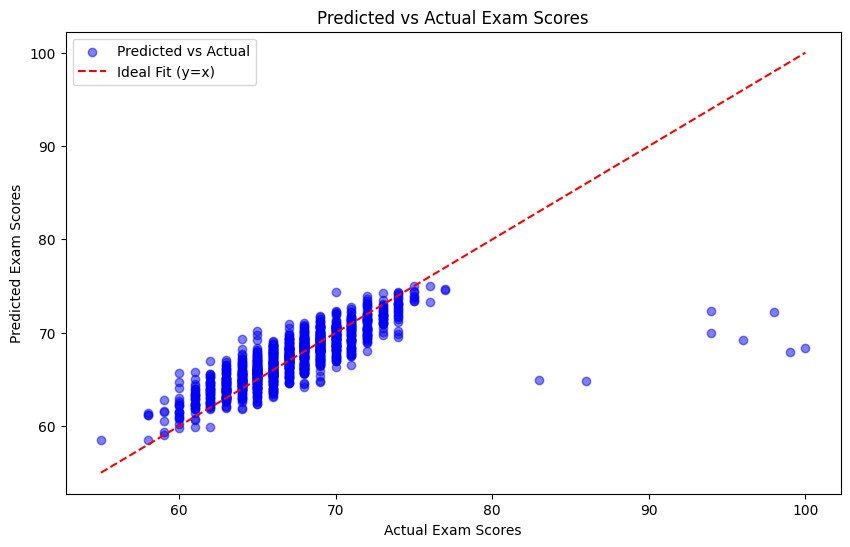

In [27]:
# Predictions on the testing set
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Predicted vs Actual Exam Scores')
plt.legend()
plt.show()

The scatter plot demonstrates a reasonably good alignment of the predicted values with the actual values along the ideal diagonal line (`y=x`), suggesting that the model captures 
the relationship between features and the target variable well.

However, there are noticeable deviations, particularly for higher actual scores where the model under-predicts. This could indicate a limitation in the model's ability to capture more complex patterns or potential biases in the dataset.

**Feature Importance Visualization**

We will create a bar plot to visualize the importance of each feature based on their coefficients. Larger coefficients indicate higher influence on the predictions.

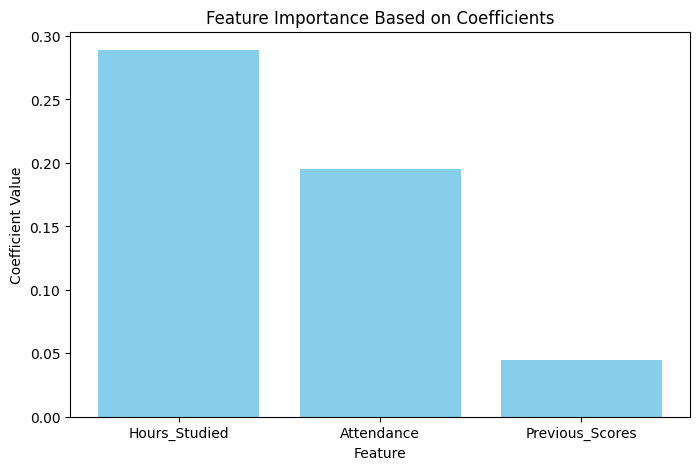

In [28]:
# Coefficients of the linear regression model
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Bar plot of feature importance
plt.figure(figsize=(8, 5))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='skyblue')
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.show()

The bar chart shows that **Hours_Studied** is the most significant predictor of `Exam_Score`, followed by **Attendance**. **Previous_Scores** has the least influence on predictions.

This visualization confirms the hypothesis that factors like attendance and hours studied can meaningfully contribute to improving exam scores, even for students with lower previous scores.

#### **Conclusion**

The analysis demonstrated that factors such as **Hours_Studied** and **Attendance** significantly influence exam performance, with the following key findings:

##### Key Findings

1. **Importance of Hours_Studied and Attendance**:  
   - These factors consistently contributed to higher exam scores across all students, with **Hours_Studied** having the strongest impact.  
   - Even students with lower **Previous_Scores** saw significant improvement when these factors were emphasized.

2. **Model Insights**:  
   - The linear regression model showed that nearly 58% of the variance in exam scores could be explained by these three factors.  
   - While **Previous_Scores** was a factor, its impact was relatively minor compared to **Hours_Studied** and **Attendance**, underscoring the opportunity for improvement regardless of prior performance.

##### Actionable Recommendations

- **For Students**:  
   Focusing on increasing study hours and maintaining consistent attendance can lead to substantial performance gains, especially for those with lower starting scores.  

- **For Educators**:  
   Programs that promote structured study habits and attendance could help elevate overall performance, particularly for struggling students.

##### Conclusion

Improving **Hours_Studied** and **Attendance** is a clear and actionable strategy to enhance academic outcomes, regardless of prior performance levels. This highlights the value of discipline and effort in overcoming initial disadvantages in exam preparedness.
